In [1]:
#using keras

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [3]:
filename = 'C:/Users/dell ap/Downloads/archive (1)/Crop_recommendation.csv'
numFeatures = 7
data = read_csv(filename)
crops = ['apple',
 'banana',
 'blackgram',
 'chickpea',
 'coconut',
 'coffee',
 'cotton',
 'grapes',
 'jute',
 'kidneybeans',
 'lentil',
 'maize',
 'mango',
 'mothbeans',
 'mungbean',
 'muskmelon',
 'orange',
 'papaya',
 'pigeonpeas',
 'pomegranate',
 'rice',
 'watermelon']
numLabels = len(crops)

In [4]:
xDataset = np.array([[x[0],x[1],x[2],x[3],x[4],x[5],x[6]] for x in data.values])
yDataset = np.array([crops.index(y[7]) for y in data.values])

for i in range(numFeatures):
    xDataset.T[i]=(xDataset.T[i]-xDataset.T[i].min())/(xDataset.T[i].max()-xDataset.T[i].min())

trainIndices    = np.random.choice(len(xDataset), round(len(xDataset) * 0.9), replace = False)
testIndices     = np.array(list(set(range(len(xDataset))) - set(trainIndices)))

xTrain          = xDataset[trainIndices]
xTest           = xDataset[testIndices]
yTrain          = yDataset[trainIndices]
yTest           = yDataset[testIndices]

In [5]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([tf.keras.layers.Dense(1000, input_shape=(numFeatures,), activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(100, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(numLabels, activation=tf.nn.softmax)])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy','mse'])
model.fit(xTrain, yTrain, epochs=100)
model.evaluate(xTest, yTest)

Epoch 1/100
62/62 [==============================] - 1s 3ms/step - loss: 2.8298 - accuracy: 0.1318 - mse: 148.9913
Epoch 2/100
62/62 [==============================] - 0s 3ms/step - loss: 2.1280 - accuracy: 0.3202 - mse: 148.9945
Epoch 3/100
62/62 [==============================] - 0s 3ms/step - loss: 1.4751 - accuracy: 0.5232 - mse: 148.9990
Epoch 4/100
62/62 [==============================] - 0s 3ms/step - loss: 1.0661 - accuracy: 0.6707 - mse: 149.0035
Epoch 5/100
62/62 [==============================] - 0s 3ms/step - loss: 0.7892 - accuracy: 0.7662 - mse: 149.0079
Epoch 6/100
62/62 [==============================] - 0s 3ms/step - loss: 0.6166 - accuracy: 0.8040 - mse: 149.0123
Epoch 7/100
62/62 [==============================] - 0s 3ms/step - loss: 0.5082 - accuracy: 0.8343 - mse: 149.0155
Epoch 8/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4645 - accuracy: 0.8384 - mse: 149.0177
Epoch 9/100
62/62 [==============================] - 0s 3ms/step - loss: 0.3811 

[0.10142362862825394, 0.9772727489471436, 154.5993194580078]

7/7 [==============================] - 0s 3ms/step


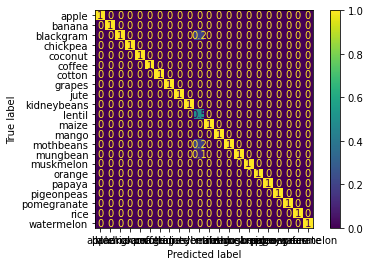

In [6]:
y_prediction = model.predict(xTest)
y_prediction = np.argmax (y_prediction, axis = 1)
#y_test=np.argmax(yTest, axis=1)
#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(yTest, y_prediction , normalize='pred')
cm_display = ConfusionMatrixDisplay(confusion_matrix = result, display_labels = crops)

cm_display.plot()
plt.show() 

In [7]:
print(classification_report(yTest, y_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8
           2       1.00      0.88      0.93        16
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        13
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00         8
          10       0.50      1.00      0.67         5
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00        13
          13       1.00      0.78      0.88         9
          14       1.00      0.93      0.96        14
          15       1.00      1.00      1.00        10
          16       1.00      1.00      1.00        15
          17       1.00    

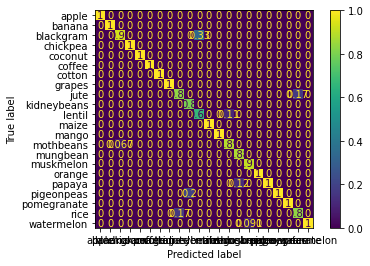

In [14]:
lr = LogisticRegression()
model = lr.fit(xTrain, yTrain)
lr_predict = lr.predict(xTest)
result = confusion_matrix(yTest,lr_predict, normalize='pred')
cm_display = ConfusionMatrixDisplay(confusion_matrix = result, display_labels = crops)
cm_display.plot()
plt.show() 